In [3]:
import openmc

photon_data = openmc.data.IncidentPhoton(atomic_number=50)

In [10]:
openmc.data.AVOGADRO

6.02214076e+23

In [9]:
import openmc.data
import numpy as np
import matplotlib.pyplot as plt

# Charger les données photoatomiques
photoatom = openmc.data.IncidentPhoton.from_endf('/Users/simonfoucambert/Documents/projects/open-mc-project/lib/cross_sections/photon/Co.h5')

# Définir les énergies (en eV)
energies = np.logspace(3, 8, 300)  # de 1 keV à 100 MeV

# Récupérer les sections efficaces totales ou spécifiques
total_cs = photoatom.cross_section['total'](energies)
photo_cs = photoatom.cross_section['photoelectric'](energies)
compton_cs = photoatom.cross_section['compton'](energies)
pair_cs = photoatom.cross_section['pair production'](energies)

# Tracer les courbes
plt.loglog(energies, total_cs, label='Total')
plt.loglog(energies, photo_cs, label='Photoélectrique')
plt.loglog(energies, compton_cs, label='Compton')
plt.loglog(energies, pair_cs, label='Création de paire')
plt.xlabel("Énergie (eV)")
plt.ylabel("Section efficace (barns)")
plt.title("Pb - Sections efficaces photon")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [22]:
import openmc.data
import numpy as np
import matplotlib.pyplot as plt

# Charger les données photoatomiques
photoatom = openmc.data.IncidentPhoton.from_hdf5("/Users/simonfoucambert/Documents/projects/open-mc-project/lib/cross_sections/photon/Pb.h5")  # nom de fichier

energies = np.logspace(3, 8, 300)  # de 1 keV à 100 MeV

# Accéder aux sections efficaces via le dictionnaire .reactions
total_cs = photoatom.reactions[1].xs(energies)     # MT=1 : total
photo_cs = photoatom.reactions[502].xs(energies)   # MT=502 : photoélectrique
compton_cs = photoatom.reactions[504].xs(energies) # MT=504 : Compton
pair_cs = photoatom.reactions[516].xs(energies)    # MT=516 : création de paire (noyau)

# Tracer
plt.loglog(energies, total_cs, label='Total')
plt.loglog(energies, photo_cs, label='Photoélectrique')
plt.loglog(energies, compton_cs, label='Compton')
plt.loglog(energies, pair_cs, label='Création de paire (noyau)')
plt.xlabel("Énergie (eV)")
plt.ylabel("Section efficace (barns)")
plt.title("Pb - Sections efficaces photons (ENDF/HDF5)")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.show()


KeyError: 1

In [23]:
print(photoatom.reactions.keys())


dict_keys([502, 504, 515, 517, 522, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 559, 560, 561])


MT disponibles : dict_keys([502, 504, 515, 517, 522, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543])
[Info] Réaction Total (MT=1) non trouvée.
[Info] Réaction Création de paire (noyau) (MT=516) non trouvée.


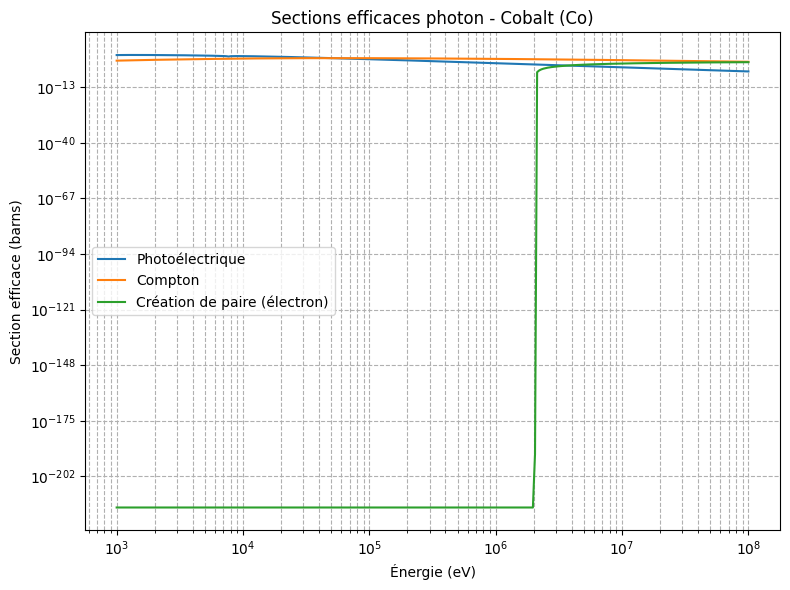

In [25]:
import openmc.data
import numpy as np
import matplotlib.pyplot as plt

# Charger fichier HDF5
photoatom = openmc.data.IncidentPhoton.from_hdf5("/Users/simonfoucambert/Documents/projects/open-mc-project/lib/cross_sections/photon/Co.h5")

# Afficher les MT disponibles
print("MT disponibles :", photoatom.reactions.keys())

# Énergies
energies = np.logspace(3, 8, 300)

# Initialisation du tracé
plt.figure(figsize=(8, 6))

# Fonction utilitaire pour tracer une section si elle existe
def tracer_cs(mt, label):
    if mt in photoatom.reactions:
        cs = photoatom.reactions[mt].xs(energies)
        plt.loglog(energies, cs, label=label)
    else:
        print(f"[Info] Réaction {label} (MT={mt}) non trouvée.")

# Tracer ce qui est dispo
tracer_cs(1, 'Total')
tracer_cs(502, 'Photoélectrique')
tracer_cs(504, 'Compton')
tracer_cs(515, 'Création de paire (électron)')
tracer_cs(516, 'Création de paire (noyau)')

# Finaliser le graphique
plt.xlabel("Énergie (eV)")
plt.ylabel("Section efficace (barns)")
plt.title("Sections efficaces photon - Cobalt (Co)")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.show()
